<a href="https://colab.research.google.com/github/YakiVS/Proyectos-NLP/blob/main/Recomendacion_peliculas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recomendador de Películas

In [1]:
import pandas as pd

In [15]:
df = pd.read_csv('/content/movie.csv', encoding='UTF-8', delimiter=';', on_bad_lines='skip')

In [16]:
df

,id,movie_title,genero,plot_keywords,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,1,Avatar,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,Color,James Cameron,723.0,178.0,0.0,855.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,2,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,3,Spectre,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,Color,Sam Mendes,602.0,148.0,0.0,161.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,4,The Dark Knight Rises,Action|Thriller,deception|imprisonment|lawlessness|police offi...,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,5,Star Wars: Episode VII - The Force Awakens ...,Documentary,NaN,NaN,Doug Walker,NaN,NaN,131.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,5039,Signed Sealed Delivered,Comedy|Drama,fraud|postal worker|prison|theft|trial,Color,Scott Smith,1.0,87.0,2.0,318.0,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5034,5040,The Following,Crime|Drama|Mystery|Thriller,cult|fbi|hideout|prison escape|serial killer,Color,NaN,43.0,43.0,NaN,319.0,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5035,5041,A Plague So Pleasant,Drama|Horror|Thriller,NaN,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5036,5042,Shanghai Calling,Comedy|Drama|Romance,NaN,Color,Daniel Hsia,14.0,100.0,0.0,489.0,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [18]:
df['genero']=df['genero'].str.replace('|',' ')
df

,id,movie_title,genero,plot_keywords,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,1,Avatar,Action Adventure Fantasy Sci-Fi,avatar|future|marine|native|paraplegic,Color,James Cameron,723.0,178.0,0.0,855.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,2,Pirates of the Caribbean: At World's End,Action Adventure Fantasy,goddess|marriage ceremony|marriage proposal|pi...,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,3,Spectre,Action Adventure Thriller,bomb|espionage|sequel|spy|terrorist,Color,Sam Mendes,602.0,148.0,0.0,161.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,4,The Dark Knight Rises,Action Thriller,deception|imprisonment|lawlessness|police offi...,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,5,Star Wars: Episode VII - The Force Awakens ...,Documentary,NaN,NaN,Doug Walker,NaN,NaN,131.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,5039,Signed Sealed Delivered,Comedy Drama,fraud|postal worker|prison|theft|trial,Color,Scott Smith,1.0,87.0,2.0,318.0,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5034,5040,The Following,Crime Drama Mystery Thriller,cult|fbi|hideout|prison escape|serial killer,Color,NaN,43.0,43.0,NaN,319.0,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5035,5041,A Plague So Pleasant,Drama Horror Thriller,NaN,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5036,5042,Shanghai Calling,Comedy Drama Romance,NaN,Color,Daniel Hsia,14.0,100.0,0.0,489.0,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [19]:
df['plot_keywords']=df['plot_keywords'].str.replace('|',' ')
df

,id,movie_title,genero,plot_keywords,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,1,Avatar,Action Adventure Fantasy Sci-Fi,avatar future marine native paraplegic,Color,James Cameron,723.0,178.0,0.0,855.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,2,Pirates of the Caribbean: At World's End,Action Adventure Fantasy,goddess marriage ceremony marriage proposal pi...,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,3,Spectre,Action Adventure Thriller,bomb espionage sequel spy terrorist,Color,Sam Mendes,602.0,148.0,0.0,161.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,4,The Dark Knight Rises,Action Thriller,deception imprisonment lawlessness police offi...,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,5,Star Wars: Episode VII - The Force Awakens ...,Documentary,NaN,NaN,Doug Walker,NaN,NaN,131.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,5039,Signed Sealed Delivered,Comedy Drama,fraud postal worker prison theft trial,Color,Scott Smith,1.0,87.0,2.0,318.0,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5034,5040,The Following,Crime Drama Mystery Thriller,cult fbi hideout prison escape serial killer,Color,NaN,43.0,43.0,NaN,319.0,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5035,5041,A Plague So Pleasant,Drama Horror Thriller,NaN,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5036,5042,Shanghai Calling,Comedy Drama Romance,NaN,Color,Daniel Hsia,14.0,100.0,0.0,489.0,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [20]:
df['texto']=df[['genero','plot_keywords']].apply(lambda row:' '.join(row.values.astype(str)),axis=1)

In [21]:
df

,id,movie_title,genero,plot_keywords,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,texto
0,1,Avatar,Action Adventure Fantasy Sci-Fi,avatar future marine native paraplegic,Color,James Cameron,723.0,178.0,0.0,855.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Action Adventure Fantasy Sci-Fi avatar future ...
1,2,Pirates of the Caribbean: At World's End,Action Adventure Fantasy,goddess marriage ceremony marriage proposal pi...,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Action Adventure Fantasy goddess marriage cere...
2,3,Spectre,Action Adventure Thriller,bomb espionage sequel spy terrorist,Color,Sam Mendes,602.0,148.0,0.0,161.0,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Action Adventure Thriller bomb espionage seque...
3,4,The Dark Knight Rises,Action Thriller,deception imprisonment lawlessness police offi...,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,Action Thriller deception imprisonment lawless...
4,5,Star Wars: Episode VII - The Force Awakens ...,Documentary,NaN,NaN,Doug Walker,NaN,NaN,131.0,NaN,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,Documentary nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,5039,Signed Sealed Delivered,Comedy Drama,fraud postal worker prison theft trial,Color,Scott Smith,1.0,87.0,2.0,318.0,...,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84,Comedy Drama fraud postal worker prison theft ...
5034,5040,The Following,Crime Drama Mystery Thriller,cult fbi hideout prison escape serial killer,Color,NaN,43.0,43.0,NaN,319.0,...,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000,Crime Drama Mystery Thriller cult fbi hideout ...
5035,5041,A Plague So Pleasant,Drama Horror Thriller,NaN,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,...,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16,Drama Horror Thriller nan
5036,5042,Shanghai Calling,Comedy Drama Romance,NaN,Color,Daniel Hsia,14.0,100.0,0.0,489.0,...,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660,Comedy Drama Romance nan


In [22]:
row = df[['genero','plot_keywords','texto']].iloc[0]

In [23]:
row

,0
genero,Action Adventure Fantasy Sci-Fi
plot_keywords,avatar future marine native paraplegic
texto,Action Adventure Fantasy Sci-Fi avatar future ...


In [28]:
print(df['texto'].iloc[0])

Action Adventure Fantasy Sci-Fi avatar future marine native paraplegic


In [29]:
# Importamos las librerías

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [30]:
tfidf = TfidfVectorizer(max_features=2000)

In [31]:
x = tfidf.fit_transform(df['texto'])

In [32]:
x

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 43945 stored elements and shape (5038, 2000)>

In [39]:
peliculas = pd.Series(df.index, index=df["movie_title"])

In [40]:
peliculas

,0
movie_title,
Avatar,0
Pirates of the Caribbean: At World's End,1
Spectre,2
The Dark Knight Rises,3
Star Wars: Episode VII - The Force Awakens,4
...,...
Signed Sealed Delivered,5033
The Following,5034
A Plague So Pleasant,5035


In [44]:
# eliminanos los espacios
peliculas.index = peliculas.index.str.strip()

In [55]:
indice = peliculas['The Dark Knight Rises']

In [56]:
indice

3

In [57]:
consulta = x[indice]
print(consulta)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8 stored elements and shape (1, 2000)>
  Coords	Values
  (0, 38)	0.1500960874654476
  (0, 1768)	0.1379080852465074
  (0, 1750)	0.3445324604958636
  (0, 464)	0.4601435556822429
  (0, 880)	0.4805716402792335
  (0, 1363)	0.26471742389223635
  (0, 1252)	0.3738476186783807
  (0, 1356)	0.4327023901432306


In [58]:
consulta.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [59]:
# calculamos la similitud
similitud = cosine_similarity(consulta,x)

In [60]:
similitud

array([[0.02771184, 0.02183707, 0.18356751, ..., 0.05067636, 0.        ,
        0.        ]])

In [61]:
similitud[0][3]

1.0000000000000002

In [62]:
similitud=similitud.flatten()

In [63]:
similitud[3]

1.0000000000000002

In [52]:
!pip install matplotlib -q

In [53]:
import matplotlib.pyplot as plt

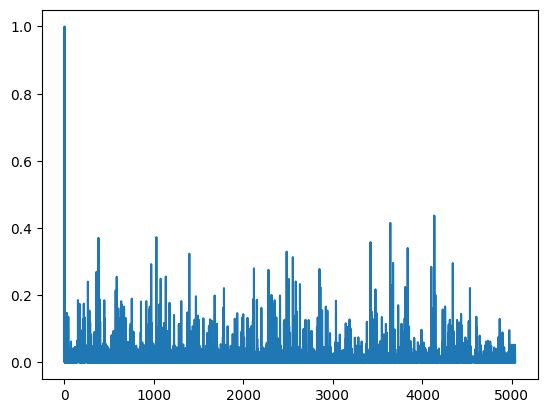

In [64]:
plt.plot(similitud)

In [65]:
# ordenamos
(-similitud).argsort()

array([   3, 4134, 3642, ..., 2626, 2662, 5037])

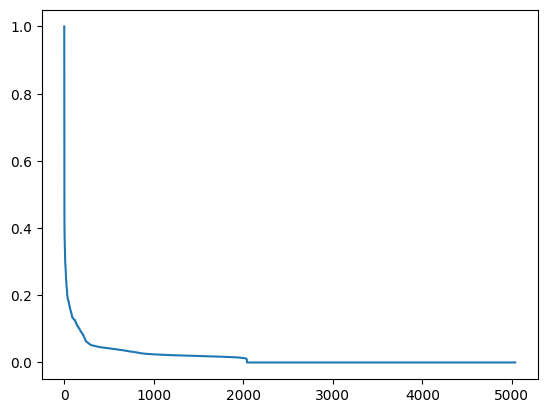

In [66]:
plt.plot(similitud[(-similitud).argsort()])

In [68]:
recomendacion = (-similitud).argsort()[1:11]

In [70]:
df['movie_title'].iloc[recomendacion]

,movie_title
4134,AWOL-72
3642,Deadfall
1029,The One
382,The Devil's Own
3421,Swelter
3836,Police Academy
2484,Let's Be Cops
1397,Lethal Weapon 3
2553,Hot Fuzz
3673,Mambo Italiano
